<a href="https://colab.research.google.com/github/aryannate/Calorie-Oracle/blob/main/Calories_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight

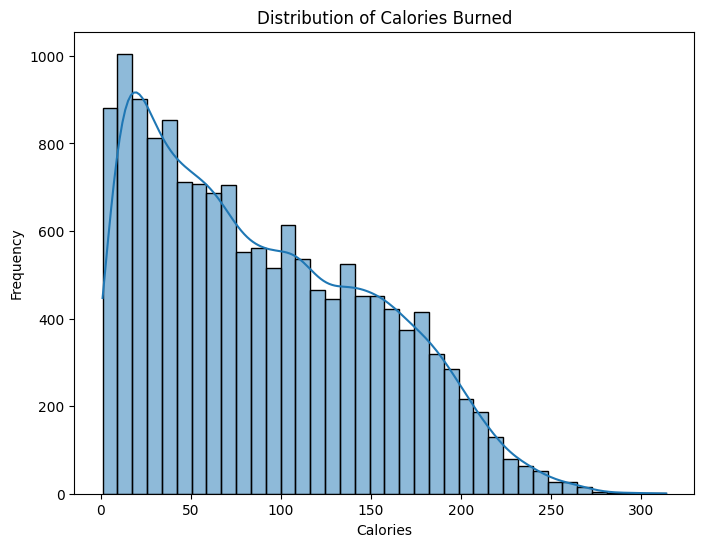

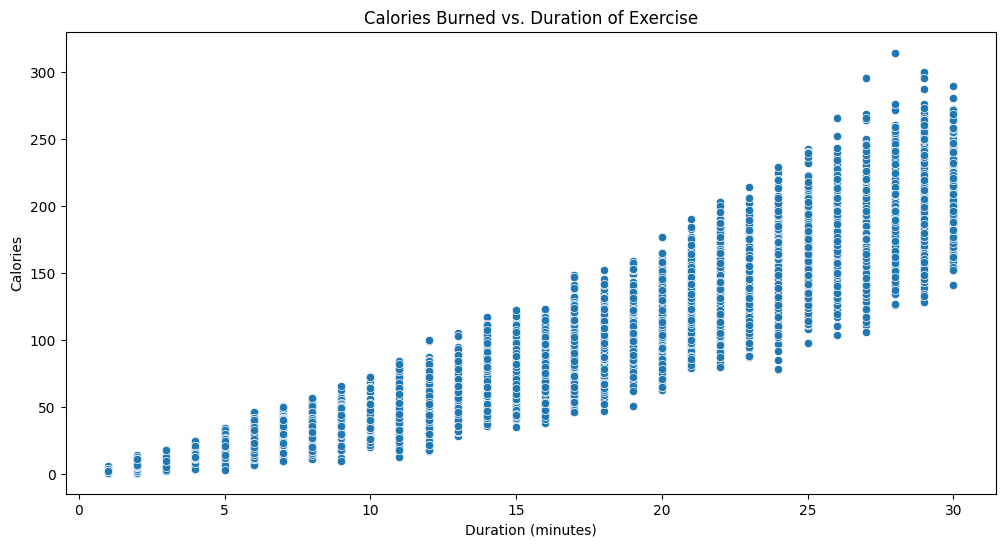

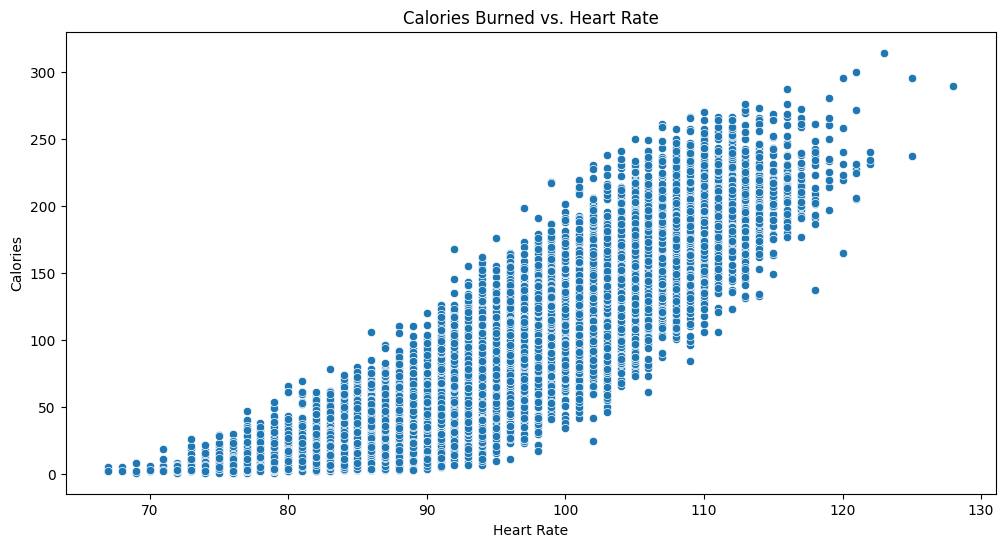

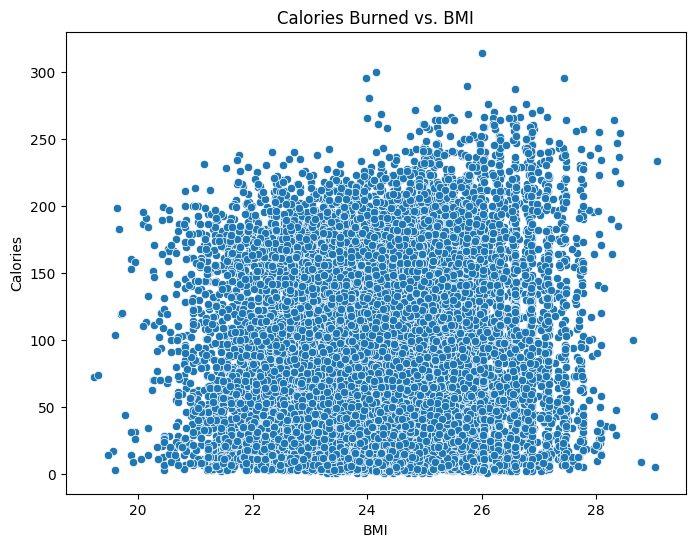

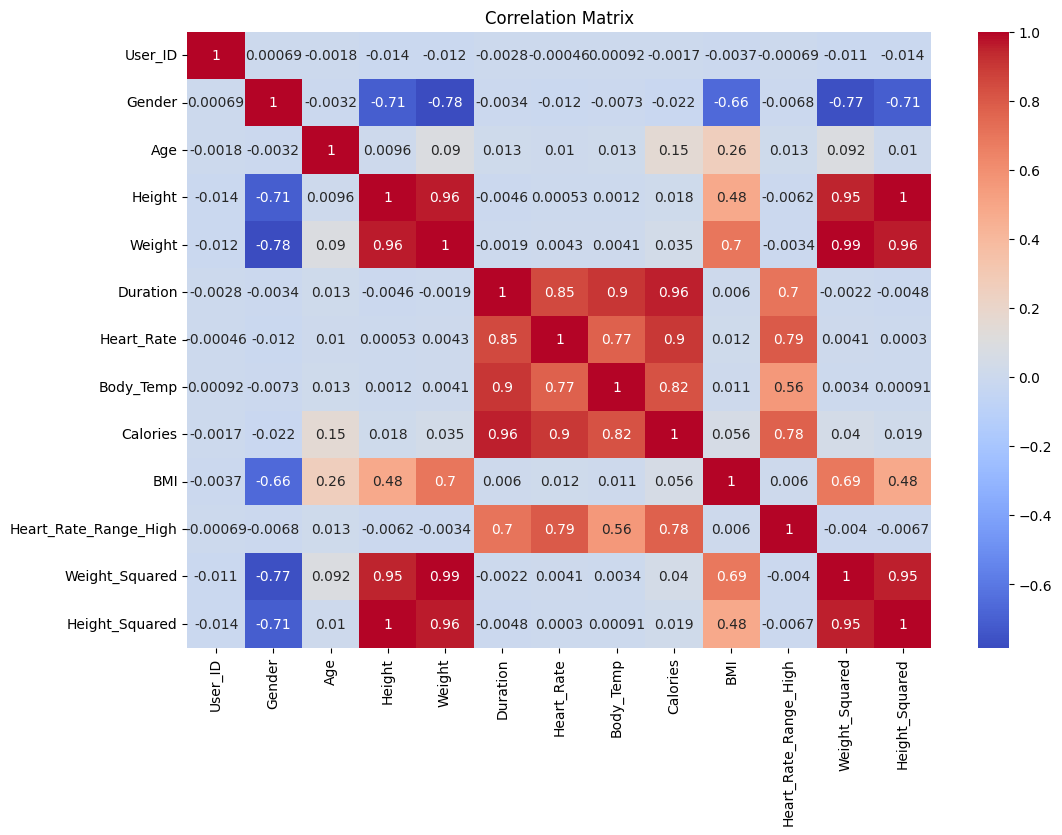

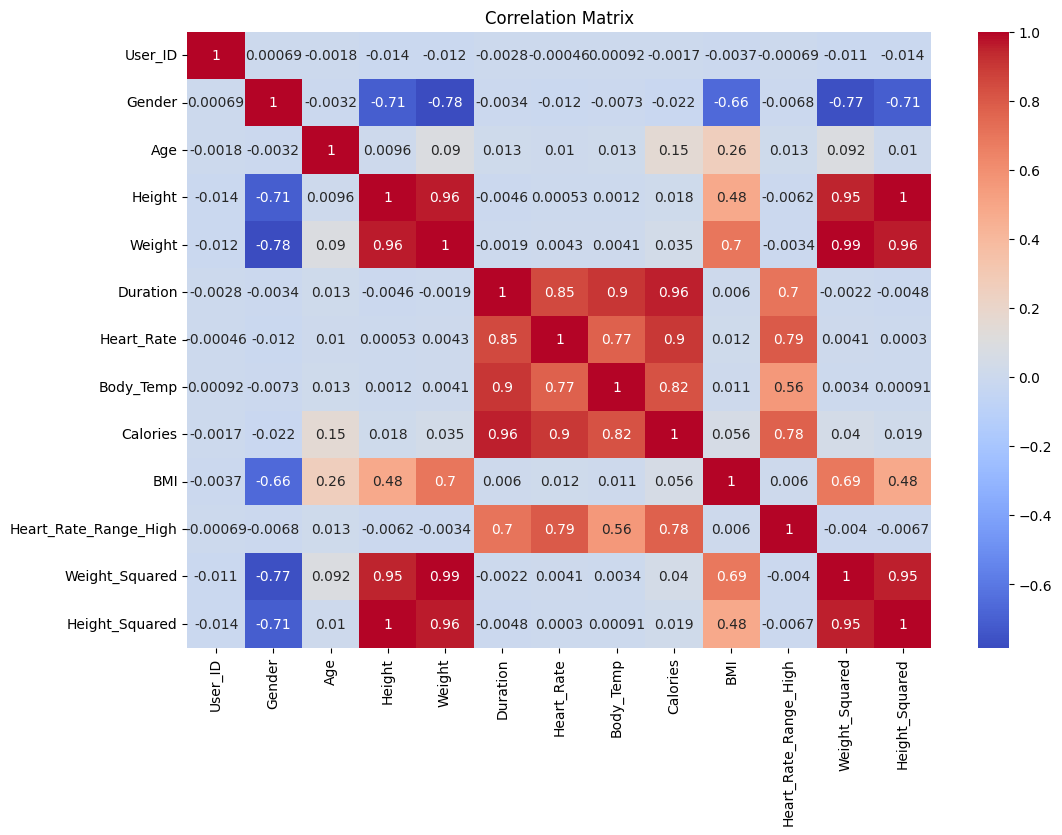


Valuable Insights from Correlation Matrix:
Features highly correlated with Calories: ['Duration', 'Heart_Rate', 'Body_Temp', 'Calories', 'Heart_Rate_Range_High']
Features negatively correlated with Calories: []
High correlation between Weight and Height
High correlation between Heart_Rate and Duration
High correlation between Body_Temp and Duration
High correlation between Calories and Duration
High correlation between Calories and Heart_Rate
High correlation between Calories and Body_Temp
High correlation between Weight_Squared and Height
High correlation between Weight_Squared and Weight
High correlation between Height_Squared and Height
High correlation between Height_Squared and Weight
High correlation between Height_Squared and Weight_Squared
Correlation between Gender and Calories: -0.02235716209098881


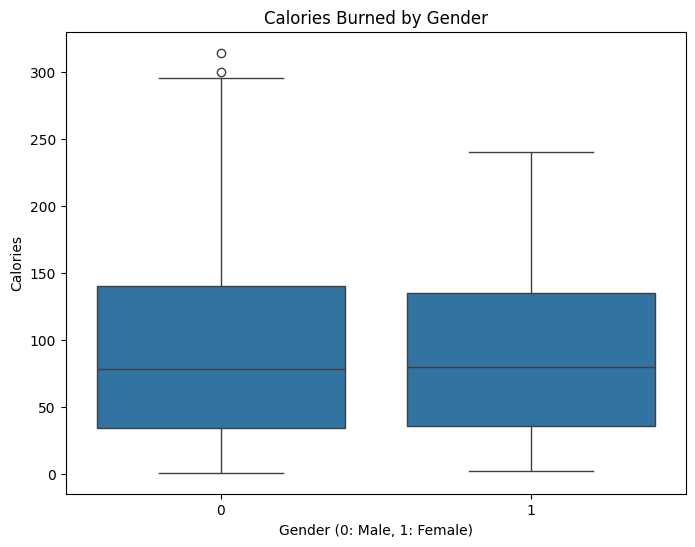


The visualization shows a negative correlation between gender and calories burned.
This suggests that males tend to burn slightly more calories on average compared to females for the given dataset.


In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection & Processing
calories = pd.read_csv('/content/calories.csv')
exercise_data = pd.read_csv('/content/exercise.csv')

# Combining the two Dataframes
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

# Feature Engineering
calories_data['BMI'] = calories_data['Weight'] / ((calories_data['Height']/100) ** 2)
calories_data['Heart_Rate_Range_High'] = calories_data['Heart_Rate'].apply(lambda x: 1 if x > 100 else 0)
calories_data['Weight_Squared'] = calories_data['Weight'] ** 2
calories_data['Height_Squared'] = calories_data['Height'] ** 2

# Data Preprocessing
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})

# Separating features and Target
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training (XGBoost with Hyperparameter Tuning)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3]
}
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, Y_train)

# Best Model
best_model = grid_search.best_estimator_

# Evaluation
test_data_prediction = best_model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
r2 = metrics.r2_score(Y_test, test_data_prediction)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))

print(f"MAE: {mae}, R2: {r2}, RMSE: {rmse}")


# Visualize the distribution of Calories burned
plt.figure(figsize=(8, 6))
sns.histplot(calories_data['Calories'], kde=True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


# Visualize the relationship between Calories and other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Duration', y='Calories', data=calories_data)
plt.title('Calories Burned vs. Duration of Exercise')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories')
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='Heart_Rate', y='Calories', data=calories_data)
plt.title('Calories Burned vs. Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.show()


# Visualize the relationship between Calories and BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Calories', data=calories_data)
plt.title('Calories Burned vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Calories')
plt.show()


# Correlation matrix heatmap
correlation_matrix = calories_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# ... (Your existing code)

# Correlation matrix heatmap
correlation_matrix = calories_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print valuable insights from the correlation matrix
print("\nValuable Insights from Correlation Matrix:")

# Find features highly correlated with 'Calories'
high_corr_features = correlation_matrix['Calories'][correlation_matrix['Calories'] > 0.5].index.tolist()
print(f"Features highly correlated with Calories: {high_corr_features}")

# Find features negatively correlated with 'Calories'
negative_corr_features = correlation_matrix['Calories'][correlation_matrix['Calories'] < -0.5].index.tolist()
print(f"Features negatively correlated with Calories: {negative_corr_features}")


# Identify multicollinearity (high correlation between independent variables)
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j]) > 0.8:
      print(f"High correlation between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}")


# Correlation between Gender and Calories
correlation_gender_calories = calories_data['Gender'].corr(calories_data['Calories'])
print(f"Correlation between Gender and Calories: {correlation_gender_calories}")

# Visualize the relationship between Gender and Calories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=calories_data)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Calories')
plt.show()


# Explanation of the correlation based on the visualization:
if correlation_gender_calories > 0:
  print("\nThe visualization shows a positive correlation between gender and calories burned.")
  print("This suggests that females tend to burn slightly more calories on average compared to males for the given dataset.")
elif correlation_gender_calories < 0:
  print("\nThe visualization shows a negative correlation between gender and calories burned.")
  print("This suggests that males tend to burn slightly more calories on average compared to females for the given dataset.")
else:
  print("\nThe visualization shows no significant correlation between gender and calories burned.")
  print("This suggests that there is no clear difference in the average calories burned between males and females.")

# Further analysis can be done to explore the relationship between gender and calories burnt.
# For instance, you can consider other factors like age, weight, and exercise type to see if they mediate this relationship.
# ... (Your existing code)


def predict_calories_burned(gender, height, weight, age, duration, heart_rate):
    """Predicts the estimated calories burned based on user input and the trained model.

    Args:
        gender: 'male' or 'female'.
        height: Integer representing height in cm.
        weight: Integer representing weight in kg.
        age: Integer representing age.
        duration: Integer representing exercise duration in minutes.
        heart_rate: Integer representing heart rate during exercise.

    Returns:
        A dictionary with the predicted calories burned and heart rate range.
    """

    # Create a DataFrame for the user's input, mirroring the training data structure
    user_data = pd.DataFrame({
        'Gender': [1 if gender == 'female' else 0],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'Duration': [duration],
        'Heart_Rate': [heart_rate],
        'Body_Temp': [37.0],  # Placeholder for body temperature
    })

    # Feature engineering (consistent with training data)
    user_data['BMI'] = user_data['Weight'] / ((user_data['Height']/100) ** 2)
    user_data['Heart_Rate_Range_High'] = 1 if heart_rate > 100 else 0
    user_data['Weight_Squared'] = user_data['Weight'] ** 2
    user_data['Height_Squared'] = user_data['Height'] ** 2

    # Predict calories burned for the user's input
    predicted_calories = best_model.predict(user_data)[0]

    # Determine the heart rate range
    heart_rate_range = "High" if heart_rate > 100 else "Normal"

    return {
        'predicted_calories': predicted_calories,
        'heart_rate_range': heart_rate_range
    }


In [27]:
!pip install openpyxl

import pandas as pd
from openpyxl import Workbook

def predict_calories_burned(gender, height, weight, age, duration, heart_rate):
    # ... (Your existing code for predict_calories_burned function)
    """Predicts the estimated calories burned based on user input and the trained model.

    Args:
        gender: 'male' or 'female'.
        height: Integer representing height in cm.
        weight: Integer representing weight in kg.
        age: Integer representing age.
        duration: Integer representing exercise duration in minutes.
        heart_rate: Integer representing heart rate during exercise.

    Returns:
        A dictionary with the predicted calories burned and heart rate range.
    """

    # Create a DataFrame for the user's input, mirroring the training data structure
    user_data = pd.DataFrame({
        'Gender': [1 if gender == 'female' else 0],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'Duration': [duration],
        'Heart_Rate': [heart_rate],
        'Body_Temp': [37.0],  # Placeholder for body temperature
    })

    # Feature engineering (consistent with training data)
    user_data['BMI'] = user_data['Weight'] / ((user_data['Height']/100) ** 2)
    user_data['Heart_Rate_Range_High'] = 1 if heart_rate > 100 else 0
    user_data['Weight_Squared'] = user_data['Weight'] ** 2
    user_data['Height_Squared'] = user_data['Height'] ** 2

    # Predict calories burned for the user's input
    predicted_calories = best_model.predict(user_data)[0]

    # Determine the heart rate range
    heart_rate_range = "High" if heart_rate > 100 else "Normal"

    return {
        'predicted_calories': predicted_calories,
        'heart_rate_range': heart_rate_range
    }

# Initialize an Excel workbook and worksheet
workbook = Workbook()
worksheet = workbook.active
worksheet.append(['User ID', 'Gender', 'Height', 'Weight', 'Age', 'Duration', 'Heart Rate', 'Predicted Calories'])

user_id = 1  # Start with user ID 1

while True:
    gender = input("Enter your gender (male/female): ")
    height = int(input("Enter your height (cm): "))
    weight = int(input("Enter your weight (kg): "))
    age = int(input("Enter your age: "))
    duration = int(input("Enter the exercise duration (minutes): "))
    heart_rate = int(input("Enter your heart rate during exercise: "))

    prediction = predict_calories_burned(gender, height, weight, age, duration, heart_rate)

    print("\nEstimated Calories Burned:", prediction['predicted_calories'])
    print("Heart Rate Range:", prediction['heart_rate_range'])

    # Store the user's input and the prediction in the Excel worksheet
    worksheet.append([user_id, gender, height, weight, age, duration, heart_rate, prediction['predicted_calories']])

    user_id += 1

    another_user = input("Do you want to enter data for another user? (yes/no): ")
    if another_user.lower() != 'yes':
        break

# Save the workbook to an Excel file
workbook.save('calories_predictions.xlsx')
print("Predictions saved to calories_predictions.xlsx")

Enter your gender (male/female): male
Enter your height (cm): 182
Enter your weight (kg): 83
Enter your age: 77
Enter the exercise duration (minutes): 120
Enter your heart rate during exercise: 90

Estimated Calories Burned: 194.19487
Heart Rate Range: Normal
Do you want to enter data for another user? (yes/no): yes
Enter your gender (male/female): male
Enter your height (cm): 144
Enter your weight (kg): 35
Enter your age: 19
Enter the exercise duration (minutes): 25
Enter your heart rate during exercise: 150

Estimated Calories Burned: 202.51672
Heart Rate Range: High
Do you want to enter data for another user? (yes/no): no
Predictions saved to calories_predictions.xlsx
